## Importing Necessary Libraries🌱

In [4]:
## For analysis and numerical functions
import pandas as pd
import numpy as np

## For Visualization and EDA
import matplotlib.pyplot as plt
import seaborn as sns

## Extra
import warnings
warnings.filterwarnings(action="ignore")

## Dataset Loading🎆

In [5]:
df = pd.read_csv("day.csv")

In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Sanity Check✔️

In [4]:
df.shape

(730, 16)

In [5]:
df.info() # No Null values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.isnull().sum() # Second confirmation, There is no null in dataset

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Check for Duplicates‼️

In [208]:
df.shape,df.drop_duplicates().shape # No Duplicates in Data

((730, 16), (730, 16))

## EDA🪴

In [209]:
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [210]:
df.drop(["instant", "dteday","casual","registered"], axis = 1,inplace=True) # We dont need these variable because we already have default index & total count col.


In [211]:
df.shape

(730, 12)

In [212]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

### Segregating Features ↔️

In [213]:
Num_Cols = ["temp", "atemp", "hum", "windspeed"]
Cat_Cols = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
target = ["cnt"]
len(Date_Col)+len(Cat_Cols)+len(Num_Cols)

12

## Category Cols Treatment


In [214]:
df.season = df.season.replace({1 : "Spring", 2 : "Summer", 3 : "Fall", 4 : "Winter"})
df.mnth = df.mnth.replace({1 : "January", 2 : "February", 3 : "March", 4 : "April", 5 : "May", 6 : "June", 7 : "July", 8 : "August", 9 : "September", 10 : "October", 11 : "November", 12 : "December"})
df.weekday = df.weekday.replace({1 : "Monday", 2 : "Tuesday", 3 : "Wednesday", 4 : "Thursday", 5 : "Friday", 6 : "Saturday", 0 : "Sunday"})
df.weathersit = df.weathersit.replace({1 : "Clear", 2 : "Mist", 3 : "Light Snow", 4 : "Heavy Rain"})

## Univariate Analysis🕐

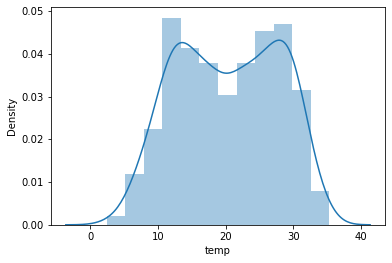

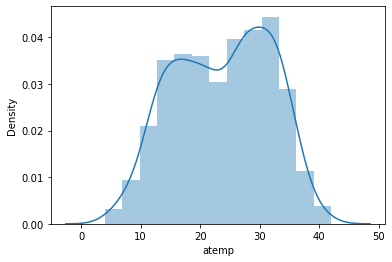

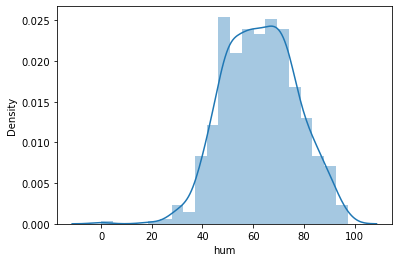

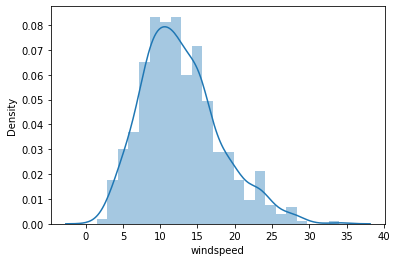

In [215]:
for i in Num_Cols:
    sns.distplot(df[i])
    plt.show()

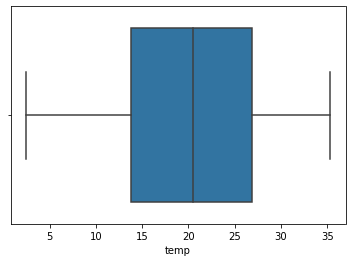

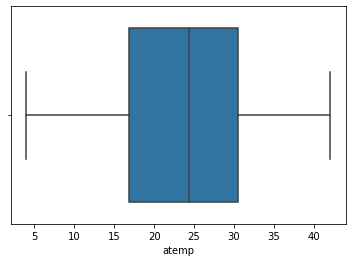

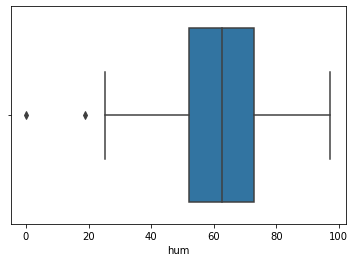

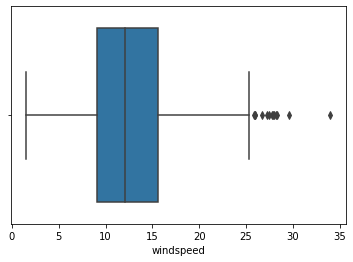

In [216]:
for i in Num_Cols:
    sns.boxplot(df[i])
    plt.show()

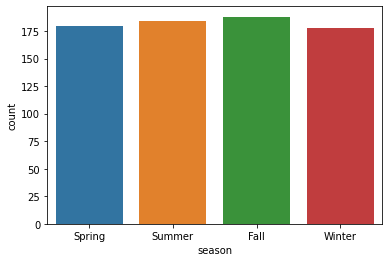

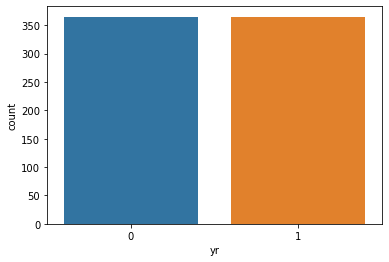

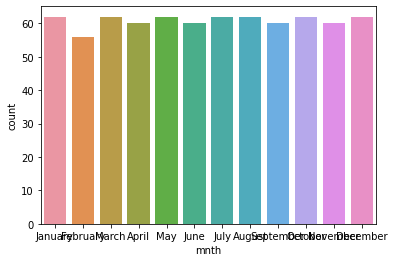

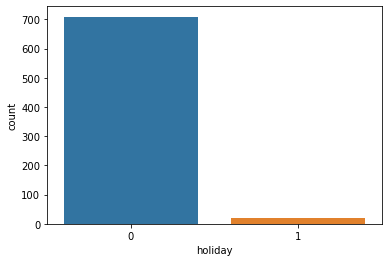

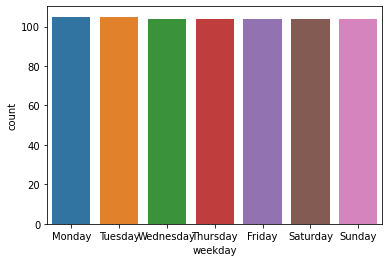

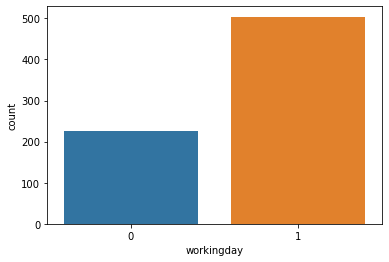

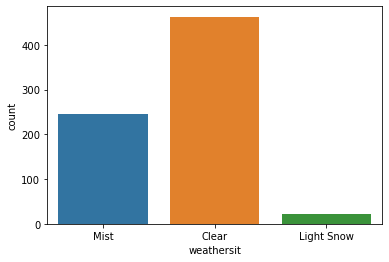

In [217]:
for i in Cat_Cols:
    sns.countplot(df[i])
    plt.show()

## Bivariate Analysis ⏸️

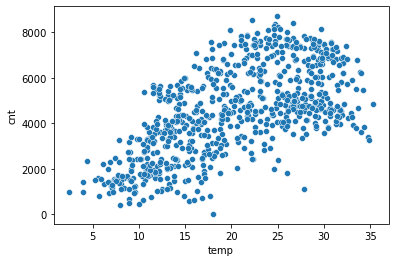

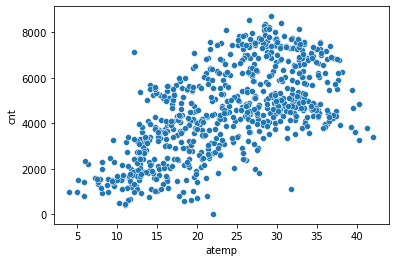

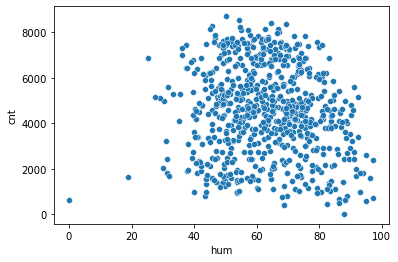

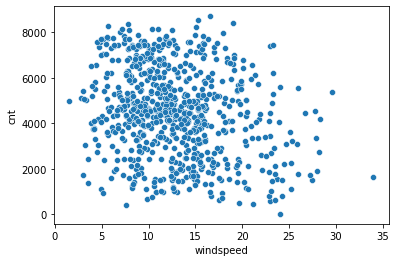

In [218]:
for i in Num_Cols:
    sns.scatterplot(df[i],df["cnt"])
    plt.show()

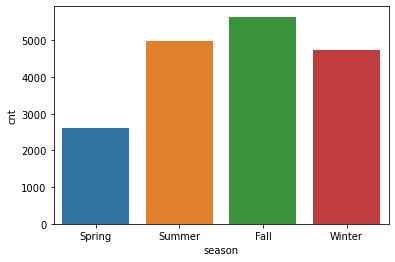

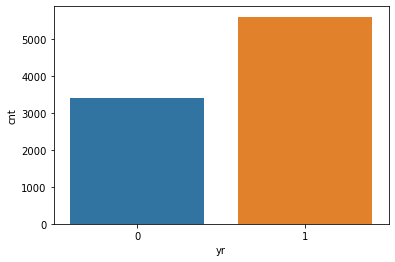

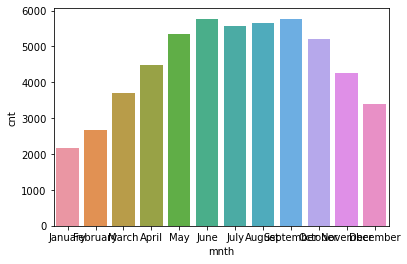

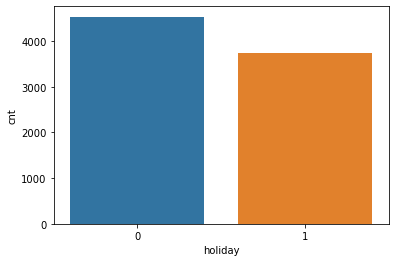

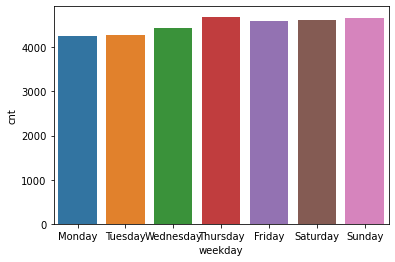

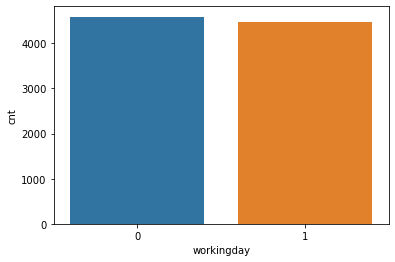

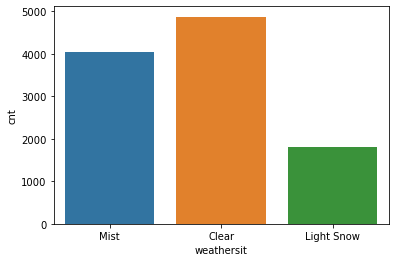

In [219]:
for i in Cat_Cols:
    sns.barplot(df[i],df["cnt"],ci = None)
    plt.show()

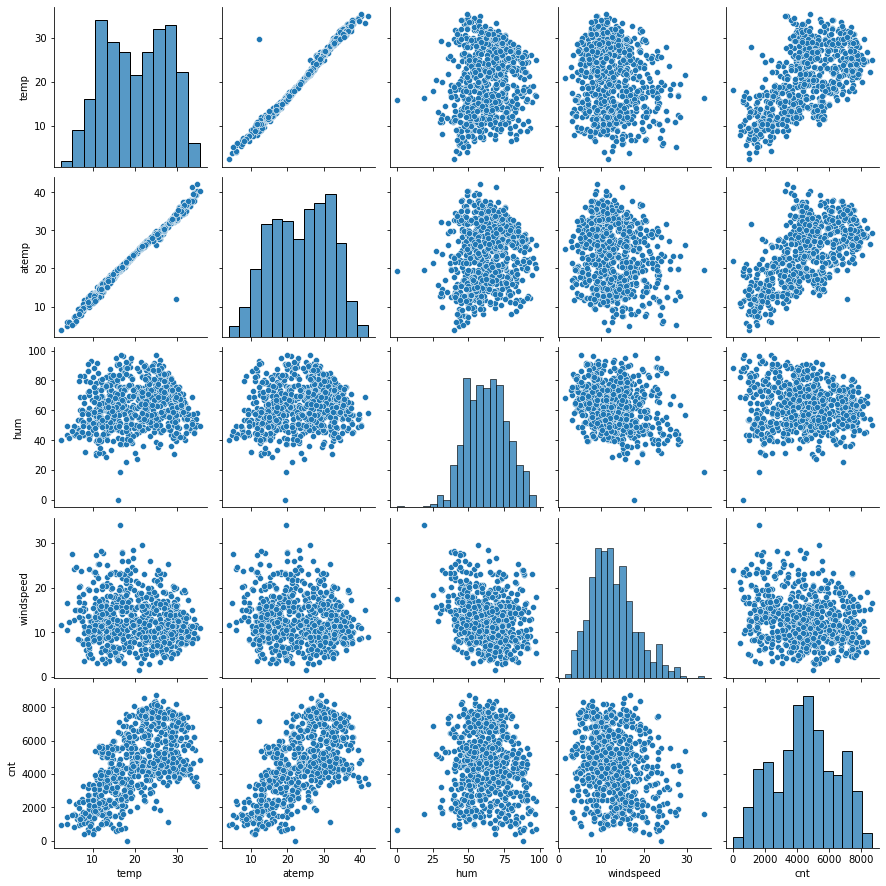

In [9]:
sns.pairplot(df[["temp", "atemp", "hum", "windspeed", "cnt"]])
plt.show()

<AxesSubplot:>

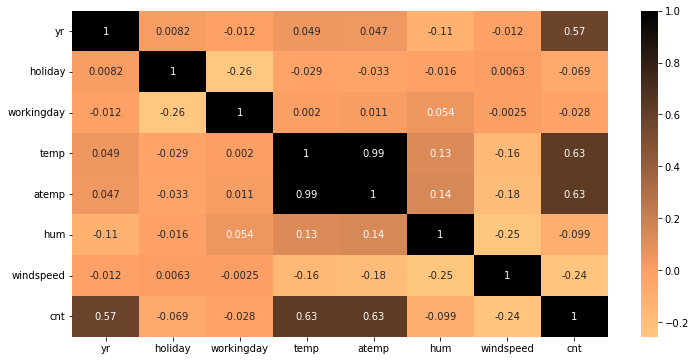

In [221]:
## HeatMap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot = True, cmap= "copper_r")

In [222]:
# yr, Temp & Atemp is most correlated to target Col.

## Pre - Processing Steps🪴

### Dummy Variable Creation 👬

In [223]:
Cat_Cols

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [224]:
df[Cat_Cols].nunique() # We will create dummy variables for only those cols who have more than 2 unique values.

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [225]:
dum = pd.get_dummies(df[["season", "mnth", "weekday", "weathersit"]],drop_first=True)

In [226]:
dum.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [227]:
data = pd.concat([df,dum],axis=1)

In [228]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
0,Spring,0,January,0,Monday,1,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [229]:
data.drop(["season", "mnth", "weekday", "weathersit"],axis=1,inplace=True)

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_Spring          730 non-null    uint8  
 9   season_Summer          730 non-null    uint8  
 10  season_Winter          730 non-null    uint8  
 11  mnth_August            730 non-null    uint8  
 12  mnth_December          730 non-null    uint8  
 13  mnth_February          730 non-null    uint8  
 14  mnth_January           730 non-null    uint8  
 15  mnth_J

In [233]:
data.shape # After dummy creation, we have 30 cols

(730, 30)

## Data Preparation🚶‍♂️

In [234]:
X = data.drop(["cnt"],axis=1)
y = data["cnt"]

In [235]:
from sklearn.model_selection import train_test_split  # Splitting data into Train & Test data in the ratio of 8:2
xtrain,xtest,ytrain,ytest =  train_test_split(X,y,test_size=0.2, random_state=100)

In [250]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((584, 29), (146, 29), (584,), (146,))

## Scaling ⚖️

In [252]:
xtrain=(xtrain-xtrain.mean())/xtrain.std()
xtest=(xtest-xtest.mean())/xtest.std()
# z=(x-xmean)/std

## Modeling

### Feature Selection using RFE

In [254]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [257]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(xtrain,ytrain)

rfe = RFE(lm,n_features_to_select=10) #running RFE
rfe = rfe.fit(xtrain,ytrain)

In [262]:
list(zip(xtrain.columns,rfe.support_))

[('yr', True),
 ('holiday', False),
 ('workingday', False),
 ('temp', True),
 ('atemp', False),
 ('hum', True),
 ('windspeed', True),
 ('season_Spring', True),
 ('season_Summer', True),
 ('season_Winter', True),
 ('mnth_August', False),
 ('mnth_December', False),
 ('mnth_February', False),
 ('mnth_January', False),
 ('mnth_July', False),
 ('mnth_June', False),
 ('mnth_March', False),
 ('mnth_May', False),
 ('mnth_November', False),
 ('mnth_October', False),
 ('mnth_September', True),
 ('weekday_Monday', False),
 ('weekday_Saturday', False),
 ('weekday_Sunday', False),
 ('weekday_Thursday', False),
 ('weekday_Tuesday', False),
 ('weekday_Wednesday', False),
 ('weathersit_Light Snow', True),
 ('weathersit_Mist', True)]

In [263]:
rfe_cols = xtrain.columns[rfe.support_] #Top 10 cols selected by RFE
rfe_cols

Index(['yr', 'temp', 'hum', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'mnth_September', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [264]:
xtrain.columns[~rfe.support_] # These cols not chosen by RFE.

Index(['holiday', 'workingday', 'atemp', 'mnth_August', 'mnth_December',
       'mnth_February', 'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March',
       'mnth_May', 'mnth_November', 'mnth_October', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

## Building Model using statsmodel, for the detailed statistics 😎

In [265]:
# Creating X_test dataframe with RFE selected variables
xtrain = xtrain[rfe_cols]

In [266]:
# Adding a constant variable 
import statsmodels.api as sm

xtrain = sm.add_constant(xtrain)

In [267]:
lm = sm.OLS(ytrain,xtrain).fit() # Running the Linear Model

In [269]:
lm.summary()  # 😅 Our 1st model is looking fantastic, but we stil have to see multi-collinearity in cols using VIF

## Columns elimination standard
 # Vif < 5
 # P-value < 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     292.7
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          9.93e-218
Time:                        22:25:44   Log-Likelihood:                -4726.5
No. Observations:                 584   AIC:                             9475.
Df Residuals:                     573   BIC:                             9523.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4505.2671     33.079    136.196      0.000    4440.296    4570.239
yr                      981.3706     33.612     29.197      0.000     915.352    1047.389
temp                   1036.9628     61.613     16.830      0.000     915.947    1157.979
hum                    -203.4023     45.873     -4.434      0.000    -293.502    -113.302
windspeed              -259.9366     36.115     -7.197      0.000    -330.871    -189.002
season_Spring          -187.2796     73.315     -2.554      0.011    -331.278     -43.281
season_Summer           269.2963     49.401      5.451      0.000     172.267     366.326
season_Winter           432.7633     58.821      7.357      0.000     317.232     548.294
mnth_September          210.3696     35.831      5.871      0.000     139.993     280.746
weathersit_Light Snow  -341.3494     36.837     -9.267      0.000    -413.701    -268.998
weathersit_Mist        -205.7383     41.674     -4.937      0.000    -287.591    -123.886
==============================================================================
Omnibus:                       96.588   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.608
Skew:                          -0.850   Prob(JB):                     3.43e-53
Kurtosis:                       5.653   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [274]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif["Feature"] = xtrain.columns

vif["VIF"] = [variance_inflation_factor(xtrain.values,i) for i in range(len(xtrain.columns))]
vif.sort_values("VIF", ascending=False)

## VIF looks good too

,Feature,VIF
5,season_Spring,4.903736
2,temp,3.463339
7,season_Winter,3.156521
6,season_Summer,2.226473
3,hum,1.919813
10,weathersit_Mist,1.584426
9,weathersit_Light Snow,1.237953
4,windspeed,1.189952
8,mnth_September,1.171280
1,yr,1.030723


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [278]:
y_train_predicted = lm.predict(xtrain)

In [279]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

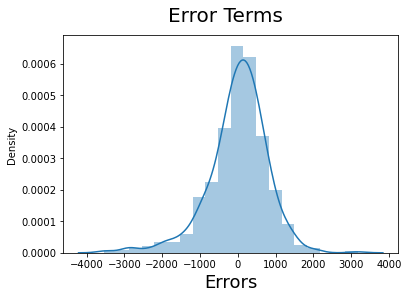

In [281]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((ytrain - y_train_predicted), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Model Evaluation

In [286]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_New = xtrain.drop(["const"], axis = 1)
X_test_new = xtest[X_train_New.columns]

# adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [287]:
# Making Predictions

y_pred = lm.predict(X_test_new)

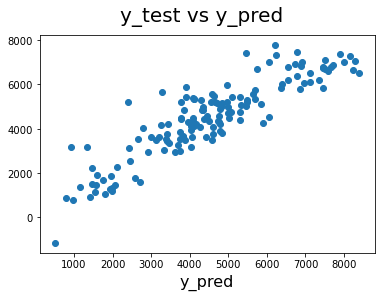

In [288]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(ytest,y_pred)
fig.suptitle("y_test vs y_pred", fontsize = 20)
plt.xlabel("y_test",fontsize = 18)
plt.xlabel("y_pred",fontsize = 16)
plt.show()

In [289]:
from sklearn.metrics import r2_score
r2_score(ytest,y_pred) # Cool

0.7910800123915146